In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/phd_reinf/')

import functions

## User Equilibrum

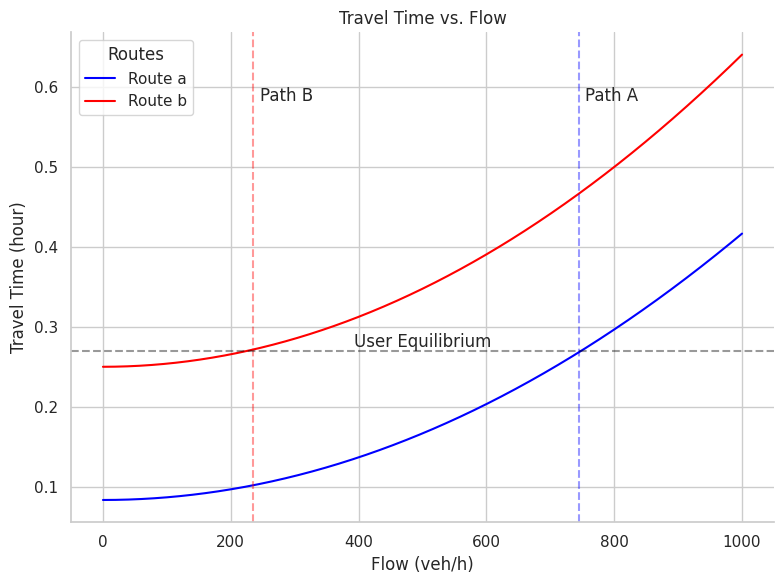

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter values
ta0 = 5 / 60  # hours
tb0 = 15 / 60  # hours
Qa = 500  # veh/h
Qb = 800  # veh/h
Q = 1000  # veh/h

# Flow values
qa = np.linspace(0, Q, 1000)  # Range of flow values for route a (0 to Q)
qb = Q - qa  # Remaining flow for route b to satisfy qa + qb = Q

# Calculate travel times using BPR formula
ta = ta0 * (1 + pow(qa / Qa, 2))
tb = tb0 * (1 + pow(qb / Qb, 2))

# Find points where travel time is the same between routes
same_travel_time_indices = np.where(ta == tb)[0]

# Set seaborn style
sns.set(style='whitegrid')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot travel times using seaborn
sns.lineplot(x=qa, y=ta, label='Route a', color='blue', linewidth=1.5)
sns.lineplot(x=qb, y=tb, label='Route b', color='red', linewidth=1.5)

# Set plot labels and title
ax.set(xlabel='Flow (veh/h)', ylabel='Travel Time (hour)', title='Travel Time vs. Flow')

# Add legend
ax.legend(title='Routes')

# Highlight points with same travel time
for index in same_travel_time_indices:
    plt.plot([qa[index], qb[index]], [ta[index], tb[index]], color='green', linestyle=':', linewidth=1.5)

# Add vertical dashed lines and labels
plt.axvline(x=745, color='blue', linestyle='--', alpha=0.4)
plt.text(755, 0.6, 'Path A', va='top')

plt.axvline(x=235, color='red', linestyle='--', alpha=0.4)
plt.text(245, 0.6, 'Path B', va='top')

# Add horizontal line and label
plt.axhline(y=0.27, color='black', linestyle='--', alpha=0.4)
plt.text(Q / 2, 0.27, 'User Equilibrium', ha='center', va='bottom')

# Adjust plot aesthetics
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
import math
from functions import custom_round

t10 = 5 / 60
t20 = 15 / 60
Q1 = 500
Q2 = 800

# Define the function
def f(t, q, Q):
    return t * (1 + (q / Q) ** 2)

# Define the equation to solve
def equation(q):
    return f(t10, q, Q1) - f(t20, 1000 - q, Q2)

# Solve the equation using the bisection method
def bisection_method(equation, a, b, tolerance=1e-6):
    while abs(b - a) > tolerance:
        midpoint = (a + b) / 2
        if equation(midpoint) == 0:
            return midpoint
        elif equation(a) * equation(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b) / 2

# Solve for q1 and q2
q1 = bisection_method(equation, 0, 1000)

# Calculate q2 using q1 + q2 = 1000
q2 = 1000 - q1

print("Number of vehicles choosing path a: ", custom_round(q1))
print("Number of vehicles choosing path b: ", custom_round(q2))

print("\nMinimum travel time for both paths", f(t10, q1, Q1), f(t20, q2, Q2))

formatted_value = "{:.10f}".format(abs(f(t10, q1, Q1) - f(t20, q2, Q2)))
print("\nMinimum reward is: ", formatted_value)

Number of vehicles choosing path a:  755
Number of vehicles choosing path b:  245

Minimum travel time for both paths 0.2734181808577901 0.2734181809672069

Minimum reward is:  0.0000000001


### Centralized

Episode: 1, Total Reward: 0.16, qa: 984, qb: 16
Episode: 2, Total Reward: 0.00, qa: 750, qb: 250
Episode: 3, Total Reward: 0.00, qa: 750, qb: 250
Episode: 4, Total Reward: 0.01, qa: 735, qb: 265
Episode: 5, Total Reward: 0.07, qa: 657, qb: 343
Episode: 6, Total Reward: 0.03, qa: 796, qb: 204
Episode: 7, Total Reward: 0.07, qa: 654, qb: 346
Episode: 8, Total Reward: 0.07, qa: 654, qb: 346
Episode: 9, Total Reward: 0.07, qa: 654, qb: 346
Episode: 10, Total Reward: 0.02, qa: 785, qb: 215
Episode: 11, Total Reward: 0.08, qa: 878, qb: 122
Episode: 12, Total Reward: 0.08, qa: 640, qb: 360
Episode: 13, Total Reward: 0.08, qa: 640, qb: 360
Episode: 14, Total Reward: 0.03, qa: 801, qb: 199
Episode: 15, Total Reward: 0.00, qa: 757, qb: 243
Episode: 16, Total Reward: 0.06, qa: 676, qb: 324
Episode: 17, Total Reward: 0.06, qa: 676, qb: 324
Episode: 18, Total Reward: 0.06, qa: 666, qb: 334
Episode: 19, Total Reward: 0.06, qa: 666, qb: 334
Episode: 20, Total Reward: 0.02, qa: 784, qb: 216
Episode: 2

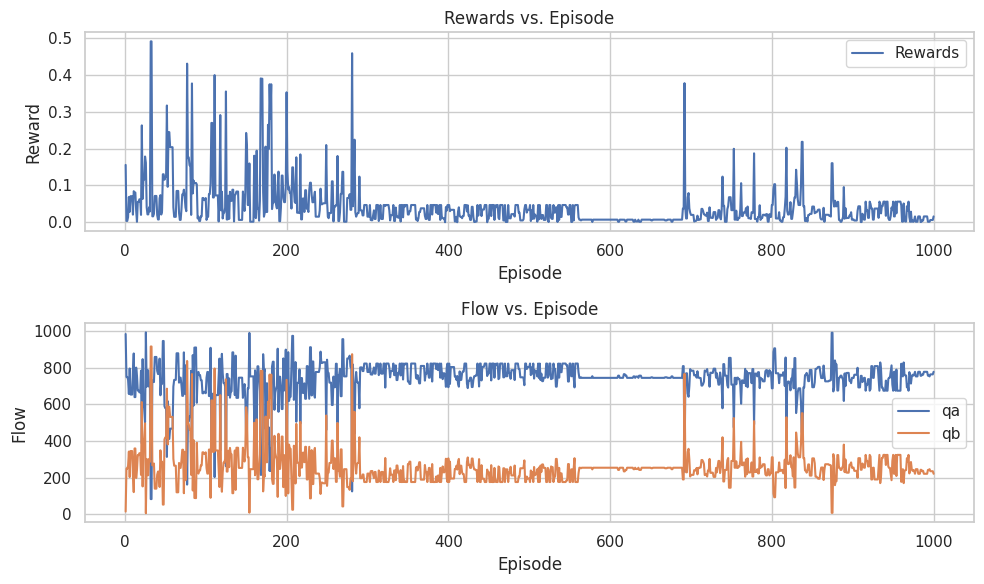

Best qa: 755, Best qb: 245, Smallest Reward: 0.00010559895833334165
qa and qb values for the lowest reward: qa=755, qb=245


In [5]:
import random
from functions import UserEquilibriumCentralizedEnvironment, UserEquilibriumCentralizedController


# Create traffic environment
Qa = 500
Qb = 800
ta0 = 5 / 60
tb0 = 15 / 60
Q = 1000
env = UserEquilibriumCentralizedEnvironment(Qa, Qb, ta0, tb0)

# Create agent
agent = UserEquilibriumCentralizedController(env)

import matplotlib.pyplot as plt

# Train the agent
num_episodes = 1000
best_qa, best_qb, best_reward, qa_values, qb_values, rewards = agent.train(num_episodes=num_episodes)

# Find the episode with the lowest reward
min_reward_index = np.argmin(rewards)
min_qa = qa_values[min_reward_index]
min_qb = qb_values[min_reward_index]

# Plot reward, qa, and qb values for the lowest reward
episode_numbers = np.arange(1, num_episodes + 1)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(episode_numbers, rewards, label='Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards vs. Episode')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(episode_numbers, qa_values, label='qa')
plt.plot(episode_numbers, qb_values, label='qb')
plt.xlabel('Episode')
plt.ylabel('Flow')
plt.title('Flow vs. Episode')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best qa: {best_qa}, Best qb: {best_qb}, Smallest Reward: {best_reward}")
print(f"qa and qb values for the lowest reward: qa={min_qa}, qb={min_qb}")

### MARL

Reward is: 0.16364758333333335, 524 vehicles choosing route a and 476 vehicles choosing route b
Minimum reward is: 0.16364758333333335 and qa in this case is: 524



Reward is: 0.17447859895833337, 509 vehicles choosing route a and 491 vehicles choosing route b
Minimum reward is: 0.16364758333333335 and qa in this case is: 524



Reward is: 0.17809466666666668, 504 vehicles choosing route a and 496 vehicles choosing route b
Minimum reward is: 0.16364758333333335 and qa in this case is: 524



Reward is: 0.16797689583333333, 518 vehicles choosing route a and 482 vehicles choosing route b
Minimum reward is: 0.16364758333333335 and qa in this case is: 524



Reward is: 0.1658117239583333, 521 vehicles choosing route a and 479 vehicles choosing route b
Minimum reward is: 0.16364758333333335 and qa in this case is: 524



Reward is: 0.18968533333333332, 488 vehicles choosing route a and 512 vehicles choosing route b
Minimum reward is: 0.16364758333333335 and qa in this case is: 524



Rewar

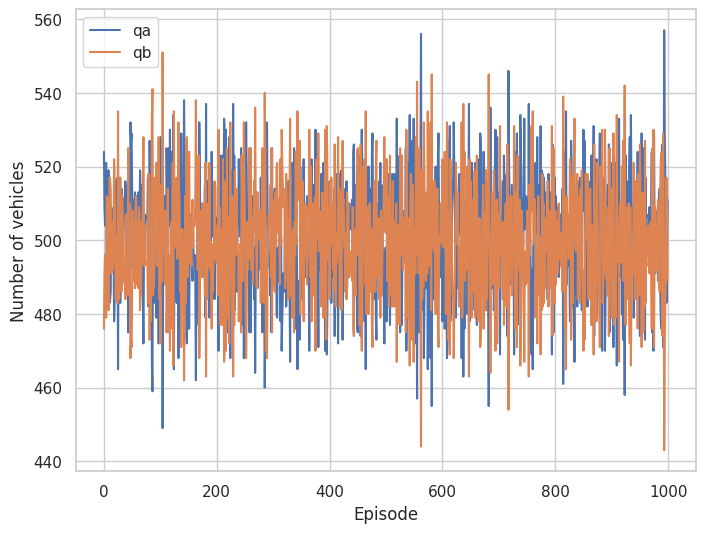

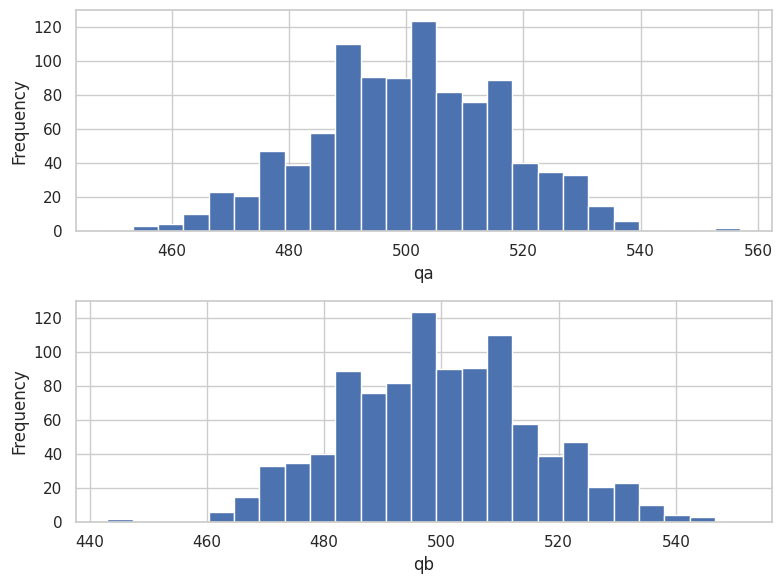

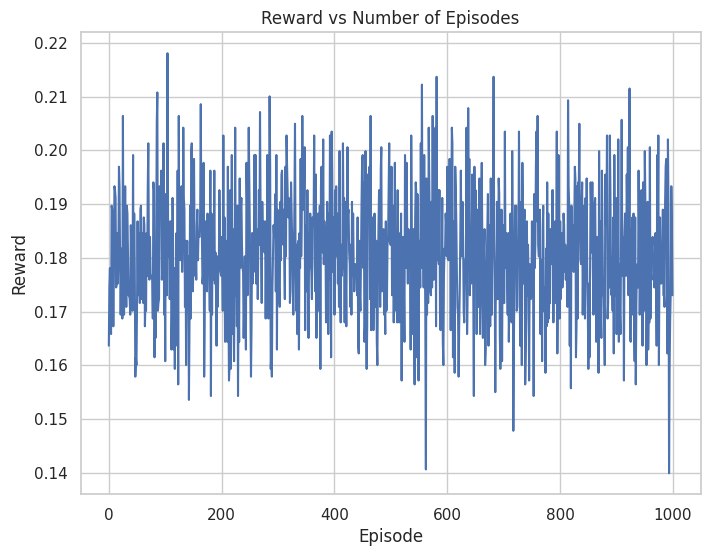

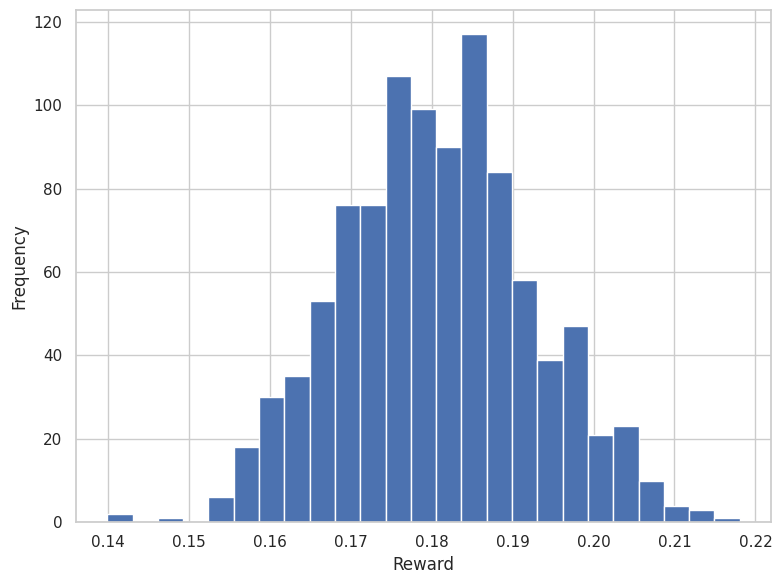


Number of vehicles choosing roote a:  557 
Number of vehicles choosing roote b:  443 
Minimum reward is:  0.13991009895833334


In [ ]:
import numpy as np
from functions import UserEquilibrumMARLEnvironment, UserEquilibrumMARLAgents


# Create environment
Qa = 500
Qb = 800
ta0 = 5 / 60
tb0 = 15 / 60
Q = 1000
env = UserEquilibrumMARLEnvironment(Qa, Qb, ta0, tb0)


# Create RL agent
agent = UserEquilibrumMARLAgents(env)

# Train the agent
num_agents = 1000
reward, min_qa = agent.train(1000, num_agents)


print("\nNumber of vehicles choosing roote a: ", min_qa, "\nNumber of vehicles choosing roote b: ", 1000 - min_qa, "\nMinimum reward is: ", reward)

## System Optimum

Minimum Value of the function:  246.99215511085941 
Vehicles choosing roote a:  597 
Vehicles choosing roote b:  403 




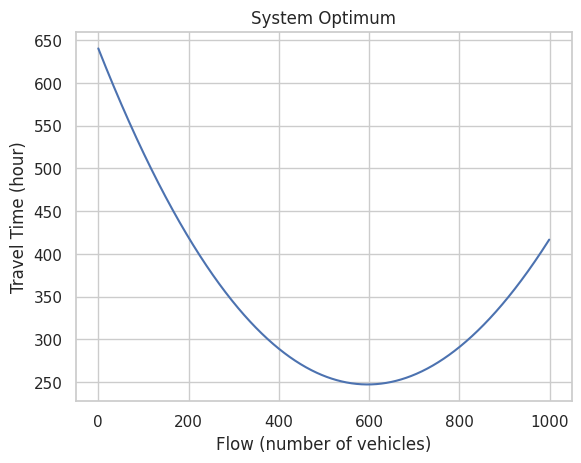

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
ta0 = 5 / 60  # hours
tb0 = 15 / 60  # hours
Qa = 500  # veh/h
Qb = 800  # veh/h
Q = 1000  # veh/h

# Flow values
qa = np.linspace(0, Q, 1000)  # Range of flow values for route a (0 to Q)
#qb = Q - qa  # Remaining flow for route b to satisfy qa + qb = Q

# Calculate travel times using BPR formula
ta = ta0 * (1 + pow(qa / Qa, 2))  
tb = tb0 * (1 + pow((Q - qa) / Qb, 2))

function = ta * qa + tb * (Q - qa)

# Minimize the cost function
min_value = np.min(function)
min_q = np.argmin(function)
print("Minimum Value of the function: ", min_value, "\nVehicles choosing roote a: ", min_q, "\nVehicles choosing roote b: ", Q - min_q, "\n\n")

# Plot travel times
plt.plot(function)
plt.ylabel('Travel Time (hour)')
plt.xlabel('Flow (number of vehicles)')
plt.title('System Optimum')
plt.grid(True)
plt.show()

### Centralized

Episode: 1, Total Reward: 286.51, qa: 406, qb: 594
Episode: 2, Total Reward: 247.70, qa: 623, qb: 377
Episode: 3, Total Reward: 247.70, qa: 623, qb: 377
Episode: 4, Total Reward: 247.14, qa: 609, qb: 391
Episode: 5, Total Reward: 247.14, qa: 609, qb: 391
Episode: 6, Total Reward: 259.37, qa: 490, qb: 510
Episode: 7, Total Reward: 277.18, qa: 430, qb: 570
Episode: 8, Total Reward: 277.18, qa: 430, qb: 570
Episode: 9, Total Reward: 246.99, qa: 597, qb: 403
Episode: 10, Total Reward: 262.04, qa: 479, qb: 521
Episode: 11, Total Reward: 249.85, qa: 649, qb: 351
Episode: 12, Total Reward: 251.70, qa: 531, qb: 469
Episode: 13, Total Reward: 290.34, qa: 397, qb: 603
Episode: 14, Total Reward: 259.37, qa: 490, qb: 510
Episode: 15, Total Reward: 259.37, qa: 490, qb: 510
Episode: 16, Total Reward: 254.09, qa: 516, qb: 484
Episode: 17, Total Reward: 270.77, qa: 747, qb: 253
Episode: 18, Total Reward: 270.77, qa: 747, qb: 253
Episode: 19, Total Reward: 289.90, qa: 398, qb: 602
Episode: 20, Total Re

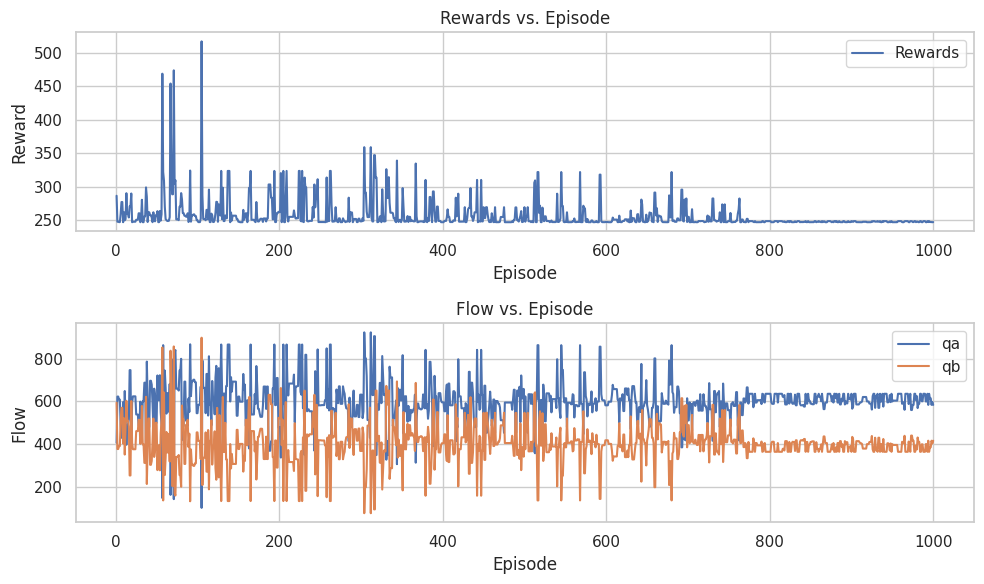

Best qa: 597, Best qb: 403, Smallest Reward: 246.992120296875
qa and qb values for the lowest reward: qa=597, qb=403


In [ ]:
import random
from functions import SystemOptimumCentralizedEnvironment, SystemOptimumCentralizedAgent


# Create traffic environment
Qa = 500
Qb = 800
ta0 = 5 / 60
tb0 = 15 / 60
Q = 1000
env = SystemOptimumCentralizedEnvironment(Qa, Qb, ta0, tb0)

# Create agent
agent = SystemOptimumCentralizedAgent(env)

import matplotlib.pyplot as plt

# Train the agent
num_episodes = 1000
best_qa, best_qb, best_reward, qa_values, qb_values, rewards = agent.train(num_episodes=num_episodes)

# Find the episode with the lowest reward
min_reward_index = np.argmin(rewards)
min_qa = qa_values[min_reward_index]
min_qb = qb_values[min_reward_index]

# Plot reward, qa, and qb values for the lowest reward
episode_numbers = np.arange(1, num_episodes + 1)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(episode_numbers, rewards, label='Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards vs. Episode')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(episode_numbers, qa_values, label='qa')
plt.plot(episode_numbers, qb_values, label='qb')
plt.xlabel('Episode')
plt.ylabel('Flow')
plt.title('Flow vs. Episode')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best qa: {best_qa}, Best qb: {best_qb}, Smallest Reward: {best_reward}")
print(f"qa and qb values for the lowest reward: qa={min_qa}, qb={min_qb}")


### MARL

Reward is: 258.0173786666667, 496 vehicles choosing route a and 504 vehicles choosing route b
Minimum reward is: 258.0173786666667 and qa in this case is:  496



Reward is: 257.37217974479165, 499 vehicles choosing route a and 501 vehicles choosing route b
Minimum reward is: 257.37217974479165 and qa in this case is:  499



Reward is: 261.5369476510417, 481 vehicles choosing route a and 519 vehicles choosing route b
Minimum reward is: 257.37217974479165 and qa in this case is:  499



Reward is: 258.6821368385417, 493 vehicles choosing route a and 507 vehicles choosing route b
Minimum reward is: 257.37217974479165 and qa in this case is:  499



Reward is: 257.8001395677083, 497 vehicles choosing route a and 503 vehicles choosing route b
Minimum reward is: 257.37217974479165 and qa in this case is:  499



Reward is: 257.585073375, 498 vehicles choosing route a and 502 vehicles choosing route b
Minimum reward is: 257.37217974479165 and qa in this case is:  499



Reward is: 252.14178

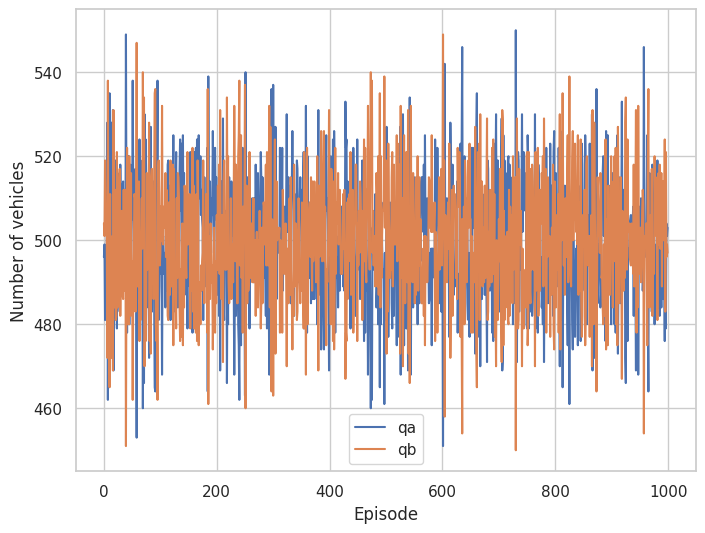

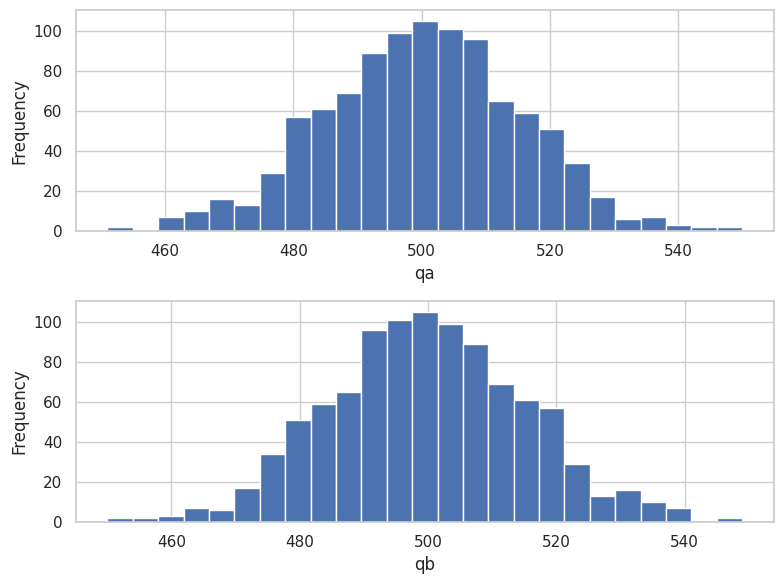

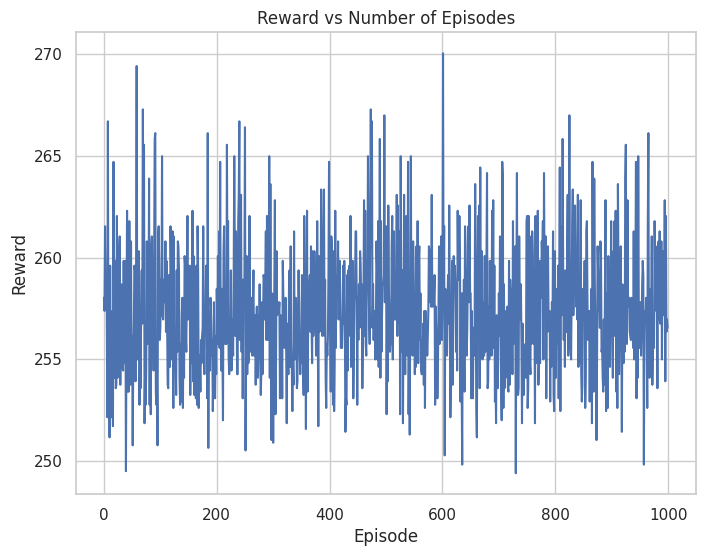

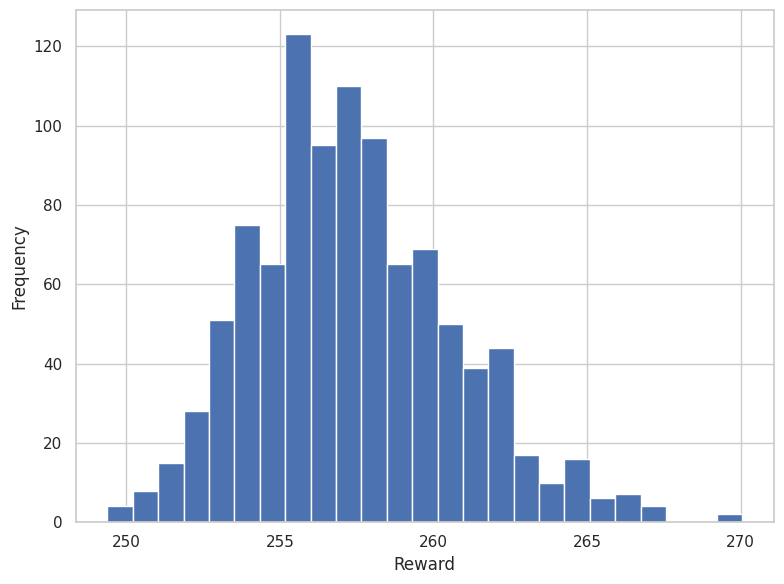


Number of vehicles choosing roote a:  550 
Number of vehicles choosing roote b:  450 
Minimum reward is:  249.38736979166666


In [ ]:
import numpy as np
from functions import SystemOptimumMARLEnvironment, SystemOptimumMARLAgents

# Create environment
Qa = 500
Qb = 800
ta0 = 5 / 60
tb0 = 15 / 60
Q = 1000
env = SystemOptimumMARLEnvironment(Qa, Qb, ta0, tb0)


# Create RL agent
agent = SystemOptimumMARLAgents(env)

# Train the agent
min_reward, min_qa = agent.train(1000, Q)


print("\nNumber of vehicles choosing roote a: ", min_qa, "\nNumber of vehicles choosing roote b: ", 1000 - min_qa, "\nMinimum reward is: ", min_reward)
